<a href="https://colab.research.google.com/github/sheikabra/soccer_player_detection/blob/main/soccer_player_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Final Project

In [ ]:
import skimage as ski
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Shape of Image:  (1025, 1916, 3)


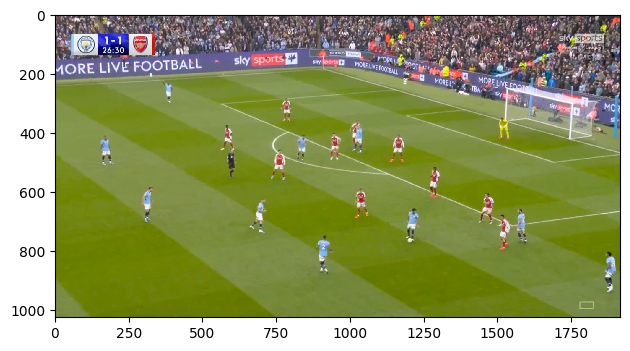

In [ ]:
img = ski.io.imread('/content/city_arsenal_game_state.png')
img = img[:,:,:3]
ski.io.imshow(img)
img_shape = img.shape
print("Shape of Image: ", img_shape)

height = img_shape[0]
width = img_shape[1]

Shape of Image:  (900, 1200, 3)


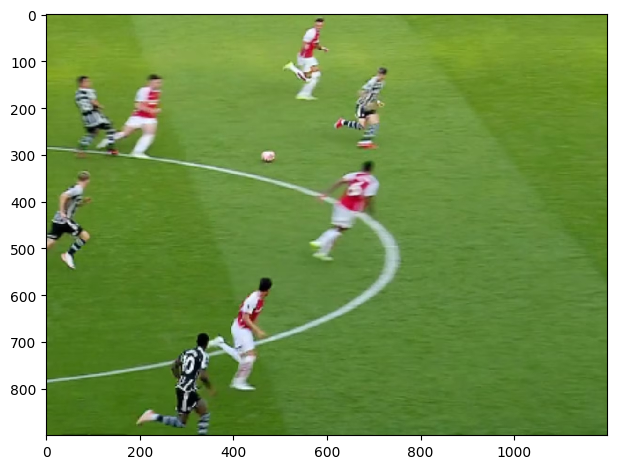

In [ ]:
img2= ski.io.imread('/content/arsenal_united_offside.jpg')
img2 = img2[:,:,:3]
ski.io.imshow(img2)
img2_shape = img2.shape
print("Shape of Image: ", img2_shape)

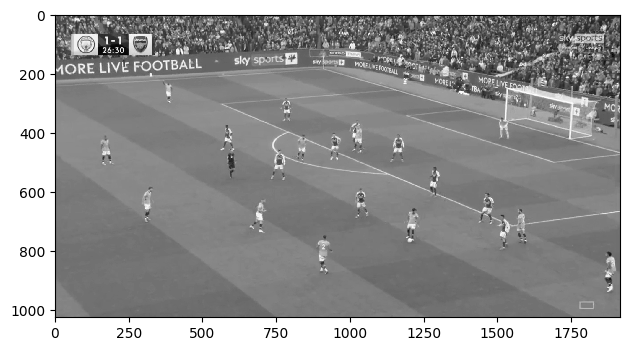

In [ ]:
gray_img = ski.color.rgb2gray(img)
ski.io.imshow(gray_img)

## Histogram Analysis

In [ ]:
def image_histogram(gray_img, range1=None, range2=None):
    img = (gray_img * 255).astype(np.uint8)
    gray_count = np.bincount(img.flatten(), minlength=256)
    gray_levels = np.arange(256)
    gray_count[0] = 0
    if range1 is not None and range2 is not None:
        zoom_mask = (gray_levels >= range1) & (gray_levels <= range2)
        gray_levels = gray_levels[zoom_mask]
        gray_count = gray_count[zoom_mask]

    plt.bar(gray_levels, gray_count)
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.title(f'Histogram of Gray Levels')
    plt.show()
    max_pixel_count = np.max(gray_count)
    max_gray_level = np.argmax(gray_count)

    return max_gray_level, max_pixel_count


# Using Hue


In [ ]:
def find_gray_peaks(img):
  ski.io.imshow(img)
  hist, bin_center = ski.exposure.histogram(img)
  peak_index = hist.argmax()
  peak_gray_level = bin_center[peak_index]
  return peak_gray_level

In [ ]:
def apply_pitch_mask(img):
  img = ski.color.rgb2hsv(img)
  h_channel = img[:, :, 0]
  height = h_channel.shape[0]
  width = h_channel.shape[1]
  segmented_img= np.zeros((height, width))
  gray_histogram = image_histogram(h_channel)
  max_gray_val = find_gray_peaks(h_channel)
  print(f"Max Gray Value: {max_gray_val * 255}")
  lower_bound = np.clip((((max_gray_val *255) - 5) /255), 0, None)
  upper_bound = np.clip(max_gray_val + 0.05, 0,1)
  print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
  segmented_img  = np.where((h_channel >= lower_bound) & (h_channel < upper_bound), 255, 0)



  return segmented_img.astype(np.uint8)



In [ ]:

def bounding_box(players, img):
    regions = ski.measure.regionprops(players)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        box_height, box_width = maxr - minr, maxc - minc
        if box_height < 250 and box_width < 250:
            rect = plt.Rectangle((minc, minr), box_width, box_height,
                                 fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    plt.title('Detected Players with Bounding Boxes')
    plt.axis('off')
    plt.show()

In [ ]:
def detect_mask_players(img):
  gaussian_img = ski.filters.gaussian(img, sigma=0.3)
  img = gaussian_img
  mask_img = apply_pitch_mask(img)
  sobel = ski.filters.sobel(mask_img)
  sobel = -sobel
  label = ski.measure.label(sobel > -0.2, connectivity=2)
  players = ski.morphology.remove_small_objects(label, min_size=100)
  box = bounding_box(players, img)
  ski.io.imshow(mask_img)
  return label

### Example 1


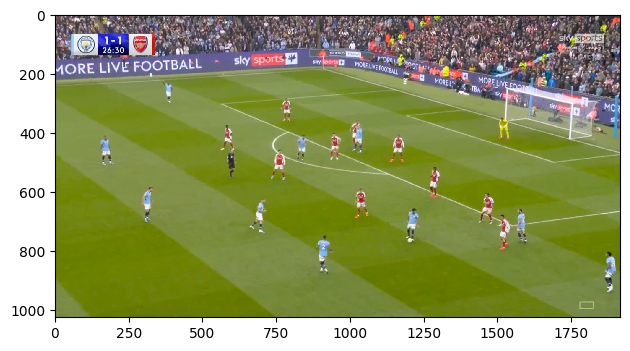

In [ ]:
ski.io.imshow(img)

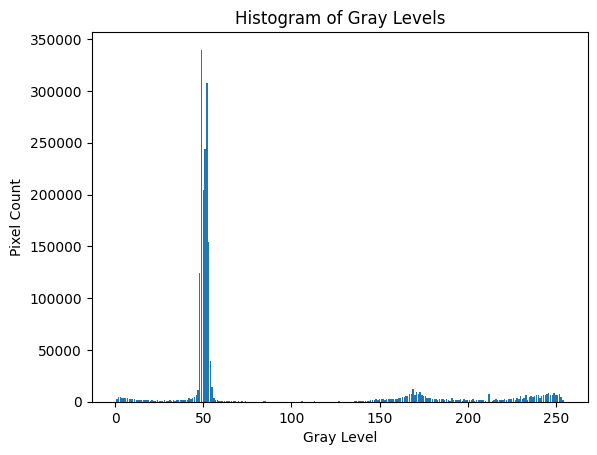

Max Gray Value: 49.30639640906738
Lower Bound: 0.1737505741532054, Upper Bound: 0.24335841729046032


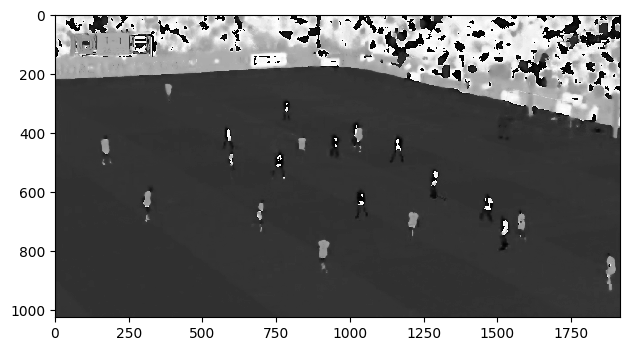

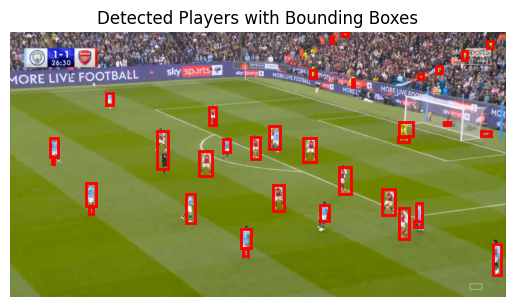

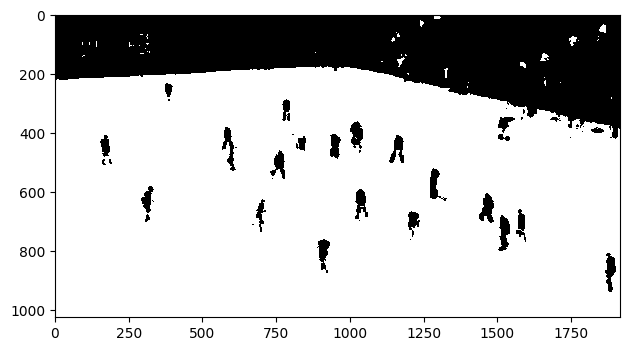

In [ ]:
players = detect_mask_players(img)

### Example 2


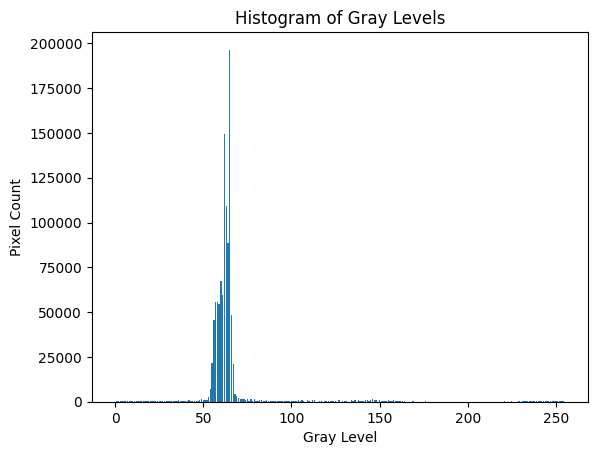

Max Gray Value: 65.20842680212468
Lower Bound: 0.2361114776553909, Upper Bound: 0.3057193207926458


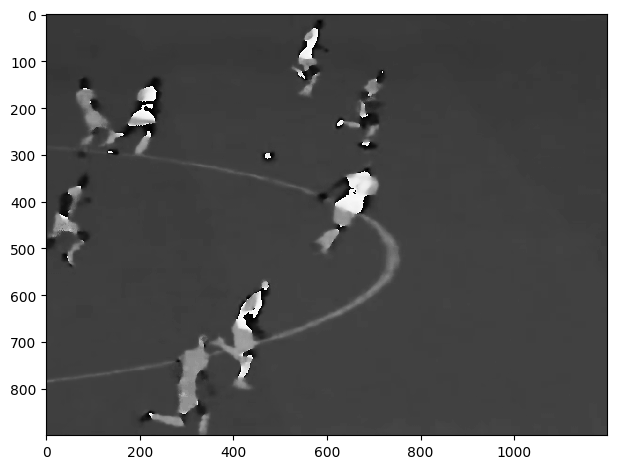

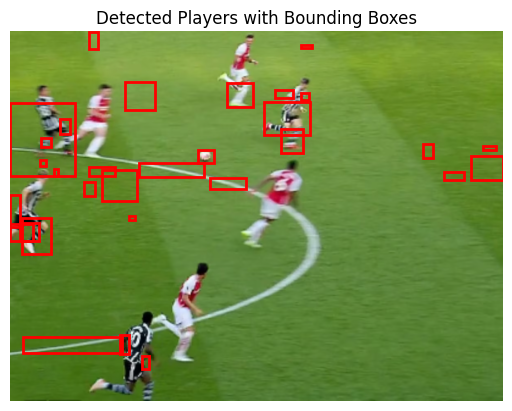

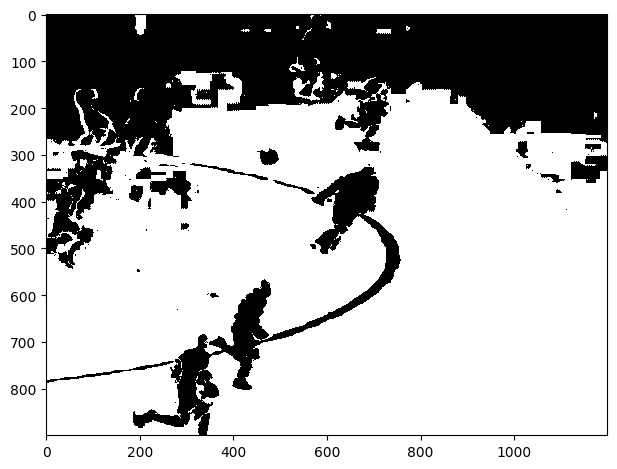

In [ ]:
players = detect_mask_players(img2)

### Example 3

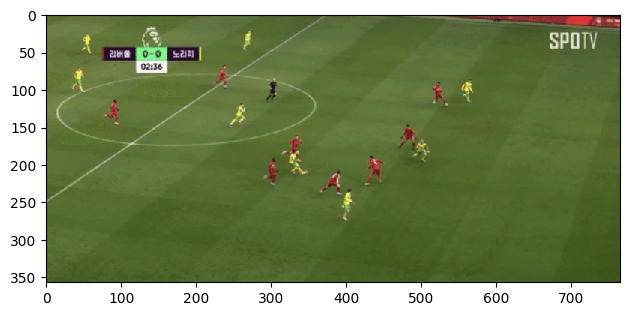

In [ ]:
img3 = ski.io.imread('/content/liverpool_example.png')
img3 = img3[:,:,:3]
ski.io.imshow(img3)

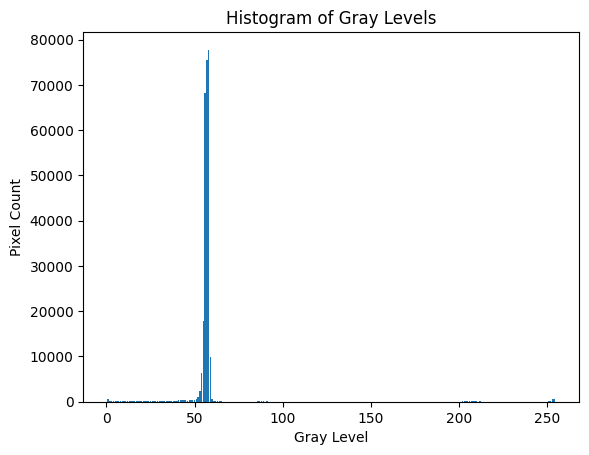

Max Gray Value: 58.28575007785108
Lower Bound: 0.2089637257954944, Upper Bound: 0.2785715689327493


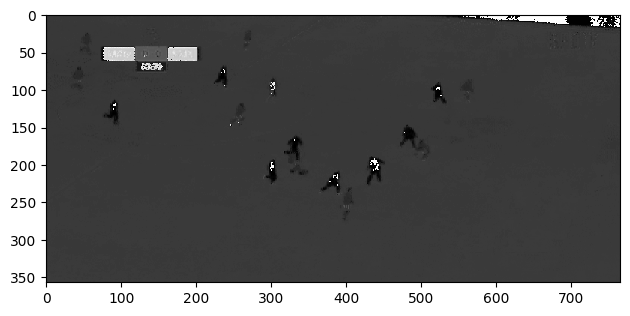

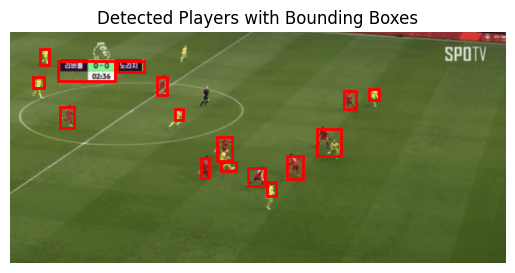

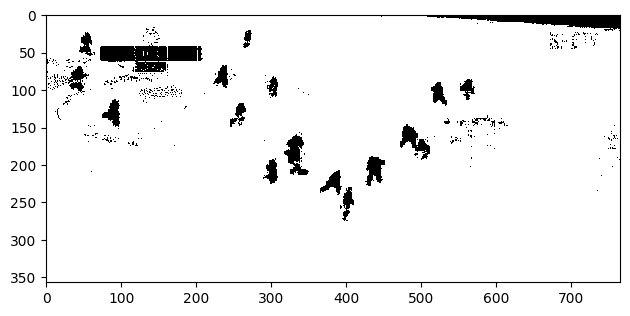

In [ ]:
players = detect_mask_players(img3)

### Example 4

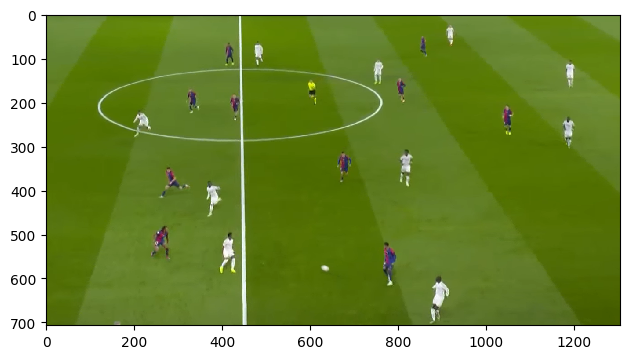

In [ ]:
img_4 = ski.io.imread('/content/mbappe_offside_1.png')
img_4 = img_4[:,:,:3]
ski.io.imshow(img_4)

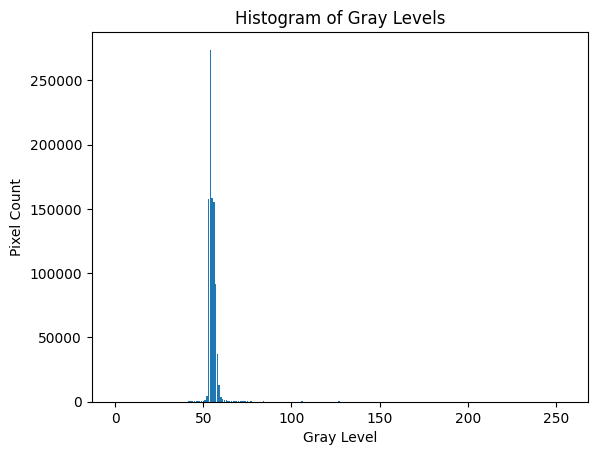

Max Gray Value: 54.27141221185975
Lower Bound: 0.1932212243602343, Upper Bound: 0.2628290674974892


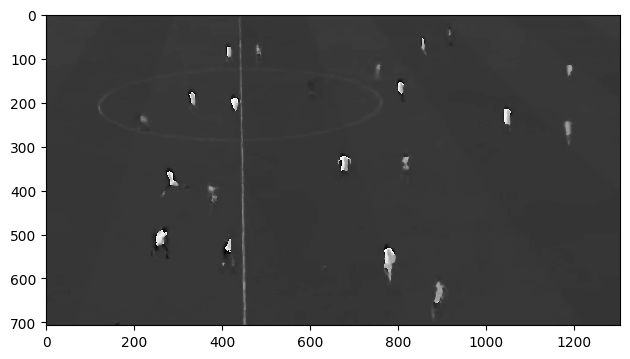

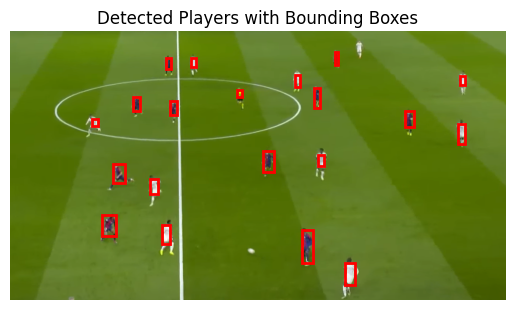

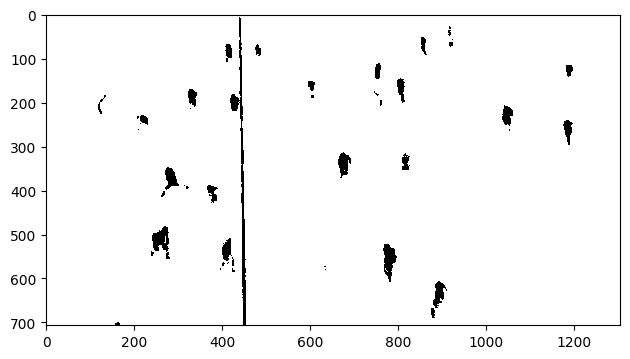

In [ ]:
players = detect_mask_players(img_4)

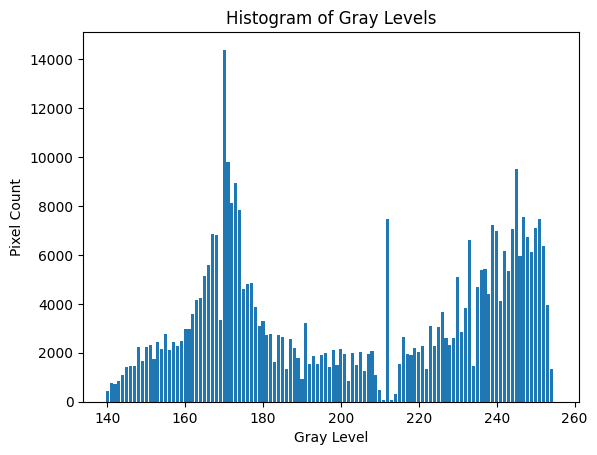

(30, 14386)

In [ ]:
hsi_img = ski.color.rgb2hsv(img)
i_channel =  hsi_img[:, :, 2]
h_channel = hsi_img[:, :, 0]
image_histogram(h_channel, 140, 255)

### Example 5

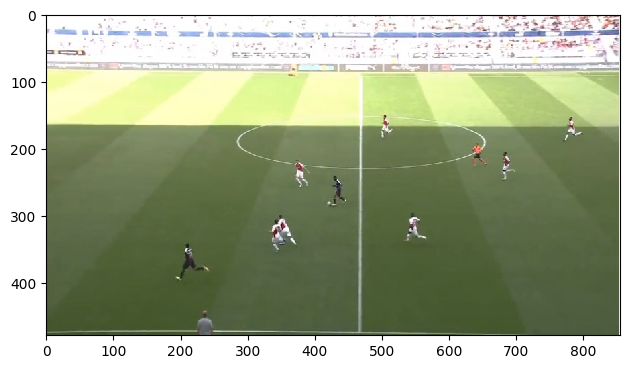

In [ ]:
img5 = ski.io.imread('/content/offside_player_example.jpg')
img5 = img5[:,:,:3]
ski.io.imshow(img5)

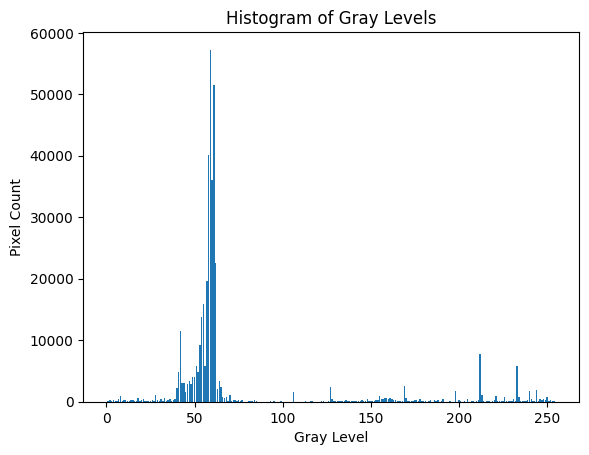

Max Gray Value: 59.26757812492597
Lower Bound: 0.2128140318624548, Upper Bound: 0.28242187499970967


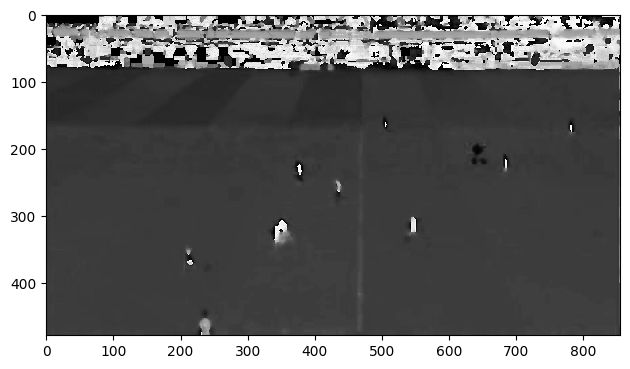

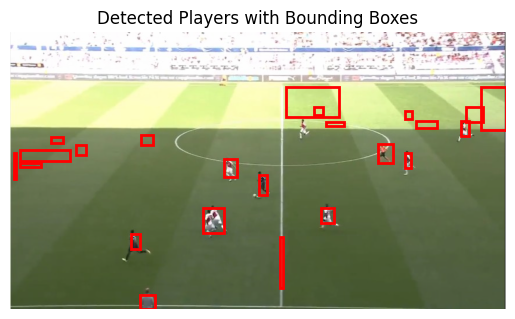

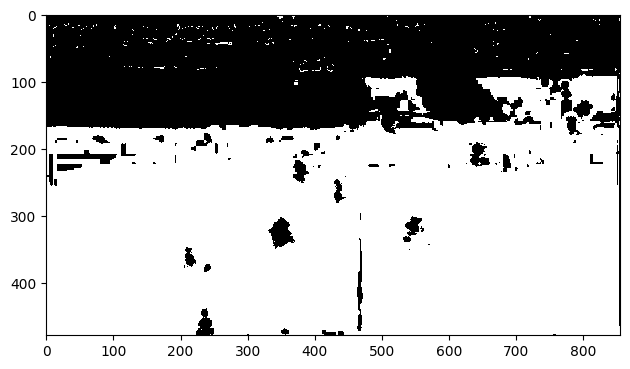

In [ ]:
players = detect_mask_players(img5)